Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                60        
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
2/2 [==============================] - 0s 131ms/step - loss: 2.5616 - mae: 2.5616 - val_loss: 2.7308 - val_mae: 2.7308
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 2.6446 - mae: 2.6446 - val_loss: 3.0731 - val_mae: 3.0731
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 2.7143 - mae: 2.7143 - val_loss: 3.0941 - val_mae: 3.0941
Epoch 4/100
2/2 [======

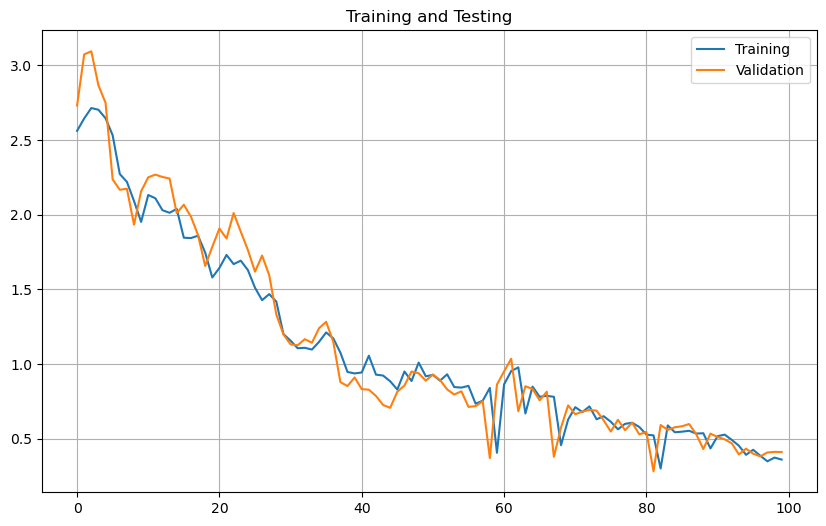

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Function of Two Variables
def func(x):
    y = np.cos(x[0]) / x[1] - np.sin(x[0]) / x[1]**2
    z = np.sin(x[0] / 2) + y * np.sin(x[0])
    return y, z

# Collecting Dataset
x = np.linspace(12, 19, 7)
x0, x1 = np.meshgrid(x, x)
x0, x1 = x0.ravel(), x1.ravel()
X = [[x0[i], x1[i]] for i in range(len(x0))]
y, z = zip(*[func(x) for x in X])

split = int(len(X) * 0.8)
x_train, y_train, z_train = X[:split], y[:split], z[:split]
x_test, y_test, z_test = X[split:], y[split:], z[split:]

# Function to display
def visual(his):
    loss = his.history['loss']
    val_loss = his.history['val_loss']
    epochs = range(len(loss))
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, loss, label='Training')
    plt.plot(epochs, val_loss, label='Validation')
    plt.title('Training and Testing')
    plt.legend()
    plt.grid()
    plt.show()

# Model with 1 inner layer and 20 neurons
model_fl2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(20, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

model_fl2.summary()

model_fl2.compile(
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=tf.keras.optimizers.schedules.ExponentialDecay(0.005, decay_steps=75, decay_rate=0.96)
    ),
    loss='mae',
    metrics=['mae']
)

# Train the model
history_f2 = model_fl2.fit(
    np.array(x_train), np.array(y_train),  # Assuming y_train is a single array
    epochs=100,
    validation_data=(np.array(x_test), np.array(y_test)),  # Assuming y_test is a single array
)

# Display learning curves
visual(history_f2)
